#📌 Extracción

In [ ]:
#Se importan las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
# En caso de que se elimine el repositorio se puede incluir la ruta del archivo "/content/TelecomX_Data.json"
df = pd.read_json(url)
df.head(5)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [ ]:
#Se normaliza el Json abriendo un total de 21 columnas
df_normalizado = pd.concat([
  df['customerID'],
  df['Churn'],
  pd.json_normalize(df['customer']),
  pd.json_normalize(df['phone']),
  pd.json_normalize(df['internet']),
  pd.json_normalize(df['account']),

  ], axis=1)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df_normalizado.sample(10)
df_normalizado.value_counts()

,,,,,,,,,,,,,,,,,,,,,count
customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,
9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6,1
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,1
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1
9970-QBCDA,No,Female,0,No,No,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.70,129.55,1
9968-FFVVH,No,Male,0,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),68.80,4111.35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8,1
0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25,1
0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45,1


In [ ]:
#Se buscan espacios en las columnas para ver si se deben realizar cambios
for col in df_normalizado.columns:
    empty_count = (df_normalizado[col] == '').sum()
    if empty_count > 0:
       print(f"Número de filas con cadenas vacías en la columna '{col}': {empty_count}")

Número de filas con cadenas vacías en la columna 'Churn': 224


In [ ]:
#Se elimina los datos de Churn ya que no es posible determinar la evasion si el campo se encuentra en blanco
df_normalizado = df_normalizado[df_normalizado['Churn'] != ''].copy()

print("Shape del DataFrame después de eliminar filas con 'Churn' vacío:")
display(df_normalizado.shape)
display(df_normalizado['Churn'].value_counts())


Shape del DataFrame después de eliminar filas con 'Churn' vacío:


(7043, 21)

,count
Churn,
No,5174
Yes,1869


In [ ]:
#Se cambia la columna Charges.Total a float y se crea nueva columna Charges.Daily
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')
df_normalizado['Charges.Daily'] = (df_normalizado['Charges.Monthly'] / 30).round(2)

df_normalizado.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
4044,5536-SLHPM,Yes,Female,0,Yes,No,55,Yes,Yes,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,77.75,4458.15,2.59
6563,9027-YFHQJ,No,Male,0,No,No,7,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.05,152.95,0.84
5810,7951-QKZPL,Yes,Female,0,Yes,Yes,33,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30,0.82
5733,7838-LAZFO,No,Male,0,Yes,No,45,Yes,No,DSL,...,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),78.80,3597.50,2.63
6489,8917-FAEMR,No,Female,0,No,No,37,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,784.25,0.66
6939,9560-ARGQJ,Yes,Female,0,No,Yes,16,Yes,No,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,81.00,1312.15,2.70
5148,7025-WCBNE,No,Male,1,No,No,47,Yes,Yes,DSL,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),59.60,2754.00,1.99
5414,7402-EYFXX,No,Male,1,No,No,26,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.60,2404.10,3.12
1851,2636-ALXXZ,Yes,Female,1,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,2.32
5297,7240-ETPTR,Yes,Female,0,Yes,No,9,No,No phone service,DSL,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,48.75,442.20,1.62


In [ ]:
print(df_normalizado.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'Charges.Daily']


In [ ]:
# Dictionary de todas las columnas a español
df_normalizado.rename(columns= {
    'customerID': 'id_cliente',
    'Churn': 'perdida',
    'gender': 'genero',
    'SeniorCitizen': 'ciudadano_Mayor',
    'Partner': 'socio',
    'Dependents': 'dependientes',
    'tenure': 'antiguedad',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'copia_seguridad_online',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_peliculas',
    'Contract': 'contrato',
    'PaperlessBilling': 'facturacion_electronica',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargos_mensuales',
    'Charges.Total': 'cargos_totales',
    'Charges.Daily': 'cargos_diarios'
}, inplace=True)

# Muestra las columnas
for col in df_normalizado.columns:
    print(col)

id_cliente
perdida
genero
ciudadano_Mayor
socio
dependientes
antiguedad
servicio_telefonico
lineas_multiples
servicio_internet
seguridad_online
copia_seguridad_online
proteccion_dispositivo
soporte_tecnico
streaming_tv
streaming_peliculas
contrato
facturacion_electronica
metodo_pago
cargos_mensuales
cargos_totales
cargos_diarios


In [ ]:
columnas_booleanas = ['perdida', 'socio', 'dependientes', 'servicio_telefonico', 'facturacion_electronica']
for columna in columnas_booleanas:
  df_normalizado[columna] = df_normalizado[columna].map({'Yes': 1, 'No': 0}).astype(np.int64)

df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7043 non-null   object 
 1   perdida                  7043 non-null   int64  
 2   genero                   7043 non-null   object 
 3   ciudadano_Mayor          7043 non-null   int64  
 4   socio                    7043 non-null   int64  
 5   dependientes             7043 non-null   int64  
 6   antiguedad               7043 non-null   int64  
 7   servicio_telefonico      7043 non-null   int64  
 8   lineas_multiples         7043 non-null   object 
 9   servicio_internet        7043 non-null   object 
 10  seguridad_online         7043 non-null   object 
 11  copia_seguridad_online   7043 non-null   object 
 12  proteccion_dispositivo   7043 non-null   object 
 13  soporte_tecnico          7043 non-null   object 
 14  streaming_tv             7043

#📊 Carga y análisis

In [ ]:
df_normalizado.describe()

,perdida,ciudadano_Mayor,socio,dependientes,antiguedad,servicio_telefonico,facturacion_electronica,cargos_mensuales,cargos_totales,cargos_diarios
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


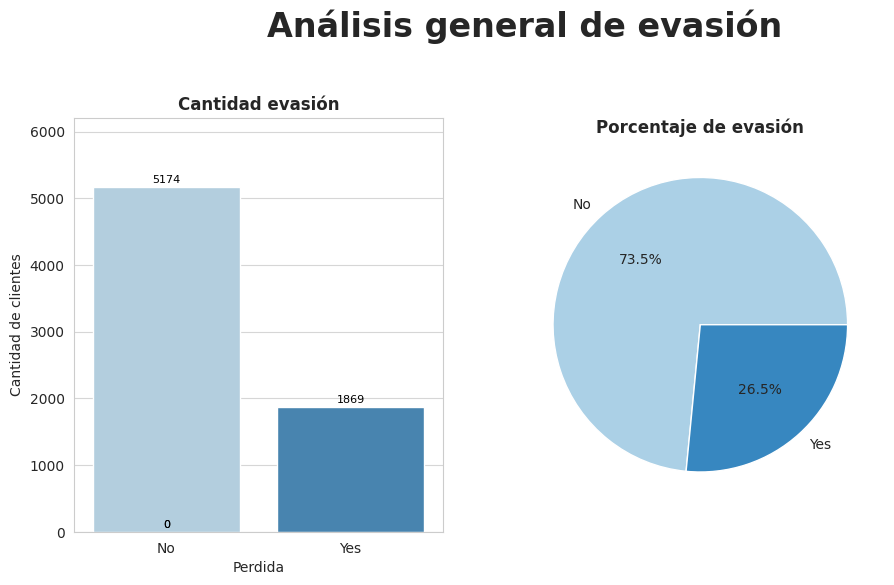

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Análisis general de evasión", fontsize = 24, fontweight = 'bold', ha='center')

sns.set_style("whitegrid")
barras = sns.barplot(x = df_normalizado['perdida'].value_counts().index,
            y = df_normalizado['perdida'].value_counts(),
            hue = df_normalizado['perdida'].value_counts().index,
            palette = 'Blues',
            ax = ax[0])

ax[0].set_title('Cantidad evasión', fontsize = 12, fontweight = 'bold', )
ax[0].set_xlabel("Perdida")
ax[0].set_ylabel('Cantidad de clientes')
ax[0].grid(axis='y', linestyle='-', alpha=0.8)
ax[0].legend().remove()
ax[0].set_ylim(0, df_normalizado['perdida'].value_counts().max() * 1.2)  # Aumenta el espacio superior
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['No', 'Yes'])
for p in barras.patches:
    ax[0].annotate(f'{int(p.get_height())}', # Formatear el valor como entero
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5), # Ajustar la posición vertical del texto
                     textcoords='offset points',
                     fontsize=8,
                     color='black')

porcentaje_churn = round(df_normalizado['perdida'].value_counts(normalize=True)*100, 2)

ax[1].pie(porcentaje_churn.values,
          labels=['No', 'Yes'],#porcentaje_churn.index,
          autopct='%1.1f%%',
          colors = sns.color_palette('Blues', n_colors=2))
ax[1].set_title('Porcentaje de evasión', fontsize = 12, fontweight = 'bold')

plt.subplots_adjust(top=0.8, right=0.8)



plt.show()

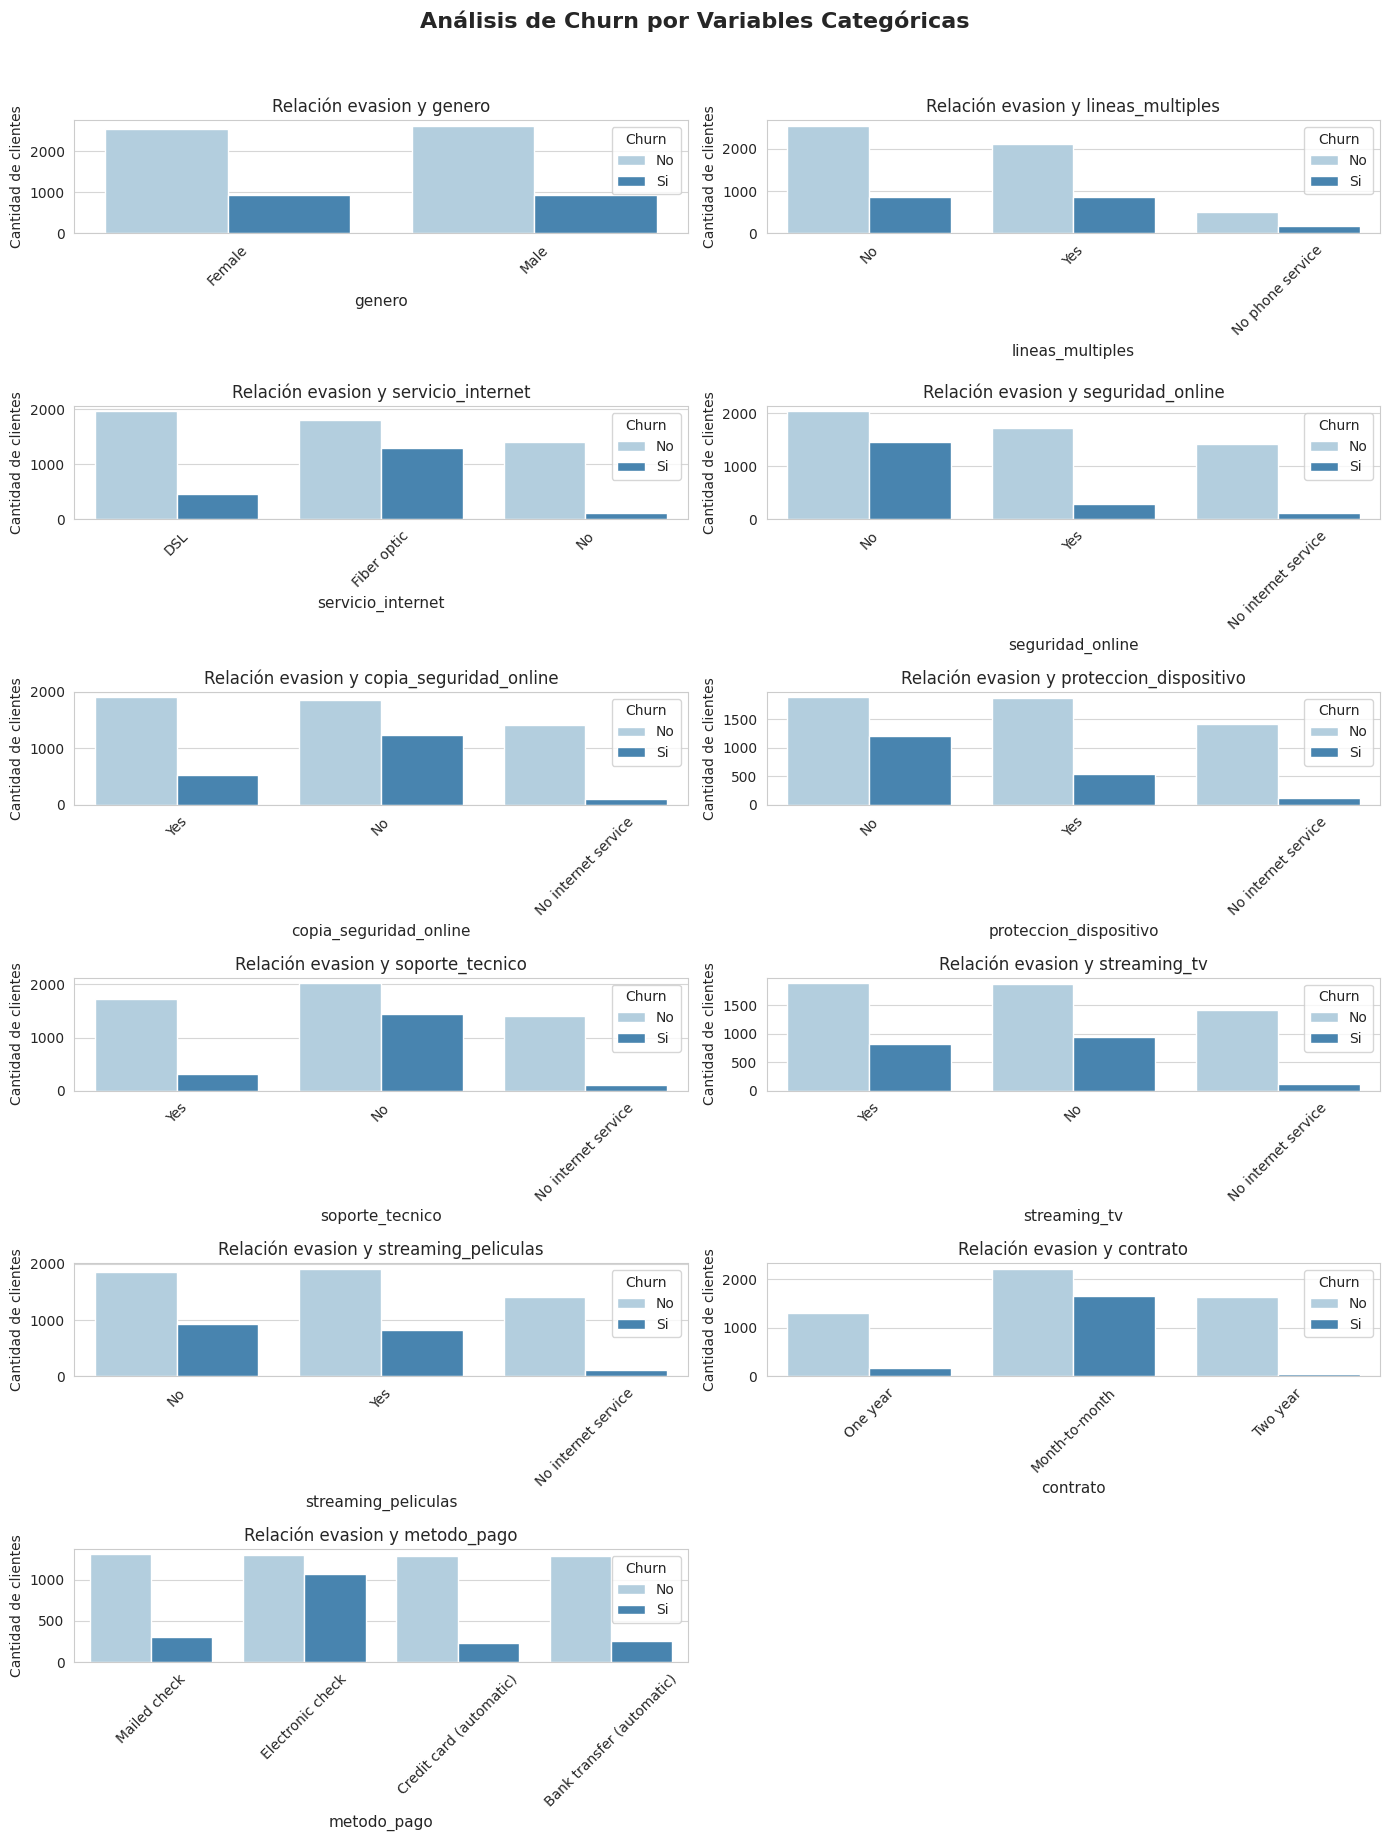

In [25]:
columnas_categoricas = ['genero', 'lineas_multiples', 'servicio_internet', 'seguridad_online',  'copia_seguridad_online',
                        'proteccion_dispositivo',       'soporte_tecnico',      'streaming_tv', 'streaming_peliculas',  'contrato',
                        'metodo_pago']

numero_columnas = 2
numero_filas = (len(columnas_categoricas) + numero_columnas - 1) // numero_columnas
fig, ax = plt.subplots(numero_filas, numero_columnas, figsize=(numero_columnas*7, numero_filas*3))
ax = ax.flatten()
plt.suptitle('Análisis de Churn por Variables Categóricas', fontsize=16, y=1.02, fontweight = 'bold')

for i, columna in enumerate(columnas_categoricas):
  if i < len(ax):

    sns.countplot(x=columna, hue='perdida', data=df_normalizado, ax=ax[i], palette='Blues')
    ax[i].set_title(f'Relación evasion y {columna}', fontsize = 12)
    ax[i].set_xlabel(columna, fontsize = 11)
    ax[i].set_ylabel('Cantidad de clientes')
    ax[i].tick_params(axis='x', rotation=45)
    ax[i].legend(title='Churn', labels=['No', 'Si'])
    ax[i].grid(axis='y', linestyle='-', alpha=0.8)

# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.subplots_adjust(top=1.2, right=0.8)
plt.tight_layout()
plt.show()

#📄Informe final

1.Repositorio y extracción de información.
Creamos un repositorio nuevo para el acceso a este analisis

2.Lectura y transformación de datos
primero se convirtio y normalizaron los datos para trabajar diferentes data frames. Se verificaron la integridad de los datos y si habian espacios en blanco, fue necesario eliminar varias filas porque en la columna evasion que es la mas importante para este analisis habia varios campos vacios.
Se generaron todos los data frames para el analisis.
Se concatenaron todos los data frames en uno solo
Se obtuvieron los datos estadisticos de el dataframe final, donde se obtuvo promedios de los datos nuemricos del dataframe como la cantidad de meses contratados y los pagos realizados
Se tiene un abandono de al rededor del 26% con respecto al total de usuarios.
Empezamos a disgregar y profundizar mas en estudio de los datos y encontramos que:
Por genero no es significativa la diferencia por que la afiliacion de las mujeres es practicamente el 50% y con relación a los hombres existe solo una leve diferencia usuarios.
Por tipo de contrato si encontramos diferencias significativas, los clientes que menos abandonan son los que optan por contratos a largo plazo especificamente de 2 años y tambien de un año pero en los contratos mes a mes se el mayor indice de abandono.
En la categoria por edades solo tenemos los rango de mayore de 65 y menores de 65, el grupode los mayores de 65 es mucho menor pero notamos que tiene una mayor incidencia de abandonos cercanos al 40% y en el grupo de los menores de 65 la incidencia de abandono es cercana al 23%.
Al analizar la categoria del tipo de servicio de internet sorprende ver que en el grupo de los usuarios que usan fibra óptica el indice de abandono es cercano al 41% y se encuentran menos abandonos en el grupo de los que no tienen conexión a internet.

Los clientes con contratos mensuales y menos servicios tienen la mayor tendencia a retirarse, con estos datos se podrian gestionar estrategias de retencion de clientes en los primero meses.
Los clientes que optan por menos servicios entran en el grupo de los clientes de menos permanencia.
Uno de los objetivos debe ser estimular clientes nuevos y clientes con contratos mes a mes para optar por contratos a uno o dos años, brindando beneficios extras en este tipo de contratos para asi disminuir efectivamente la tasa de evasion de estos.